# **Данные о продажах рекламы**

## 1. Открытие файла с данными и изучение общей информации

Представленные данные — это информация о продажах компании N с разбивкой на различные типы рекламных средств и соответствующих им показателях продаж.

**Инфо по данным:**
- **ID**: Уникальный идентификатор для каждого наблюдения.
- **TV**: Сумма денег, потраченная на рекламу по телевидению (в тысячах долларов).
- **Radio**: Сумма денег, потраченная на рекламу на радио (в тысячах долларов).
- **Newspaper**: Сумма денег, потраченная на рекламу в газетах (в тысячах долларов).
- **Sales**: Показатели продаж продукта (в тысячах единиц).

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Advertising And Sales.csv')

df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Вывод:** в данном датафрейме 200 строк и 5 столбцов.  Пропусков, нарушений в типизации данных и колонок с излишней информацией нет.

## 2. Предобработка данных

In [ ]:
df = df.rename(columns = {'Sales' : 'Product_sales'}) # переименование колонки
df.head(1)

,ID,TV,Radio,Newspaper,Product_sales
0,1,230.1,37.8,69.2,22.1


In [ ]:
df.duplicated().sum() # поиск дубликатов

0

In [ ]:
df.isna().sum() # поиск пропусков

,0
ID,0
TV,0
Radio,0
Newspaper,0
Product_sales,0


In [ ]:
df.drop("ID",axis=1,inplace=True) # удаление столбца с id
df.head(1)

,TV,Radio,Newspaper,Product_sales
0,230.1,37.8,69.2,22.1


## 3. Анализ данных

In [ ]:
df.describe()

,TV,Radio,Newspaper,Product_sales
count,200.000000,200.00000,200.000000,200.0000
mean,147.032500,23.28950,30.554000,14.0380
std,85.885186,14.86997,21.778621,5.2094
min,0.700000,0.00000,0.300000,1.6000
25%,74.375000,10.07500,12.750000,10.4000
50%,149.750000,22.90000,25.750000,12.9000
75%,218.825000,36.52500,45.100000,17.4000
max,296.400000,49.60000,114.000000,27.0000


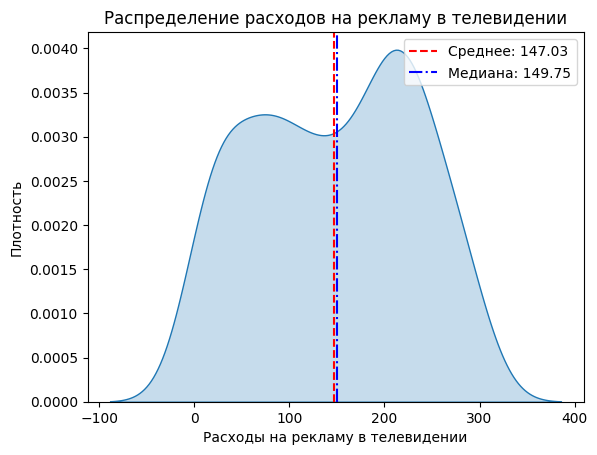

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем среднее и медианное значения
mean_value_tv = df['TV'].mean()
median_value_tv = df['TV'].median()

# Строим график KDE
sns.kdeplot(df['TV'], fill=True)
plt.title('Распределение расходов на рекламу в телевидении')
plt.xlabel('Расходы на рекламу в телевидении')
plt.ylabel('Плотность')

# Добавляем вертикальные линии
plt.axvline(mean_value_tv, color='red', linestyle='--', label=f'Среднее: {mean_value_tv:.2f}')
plt.axvline(median_value_tv, color='blue', linestyle='-.', label=f'Медиана: {median_value_tv:.2f}')

plt.legend()
plt.show()

Этот график помогает понять, как распределены значения в данных.

**Выводы по графику выше:**
- максимальная плотность достигается в диапазоне около 200-250, т.е. большинство значений сосредоточено в этом диапазоне;
- среднее и медиана расположены близко друг к другу, что говорит о том, что данные относительно симметричны;
- присутствуют отрицательные значения затрат, что выглядит как аномалия (реальные затраты на рекламу не могут быть отрицательными).

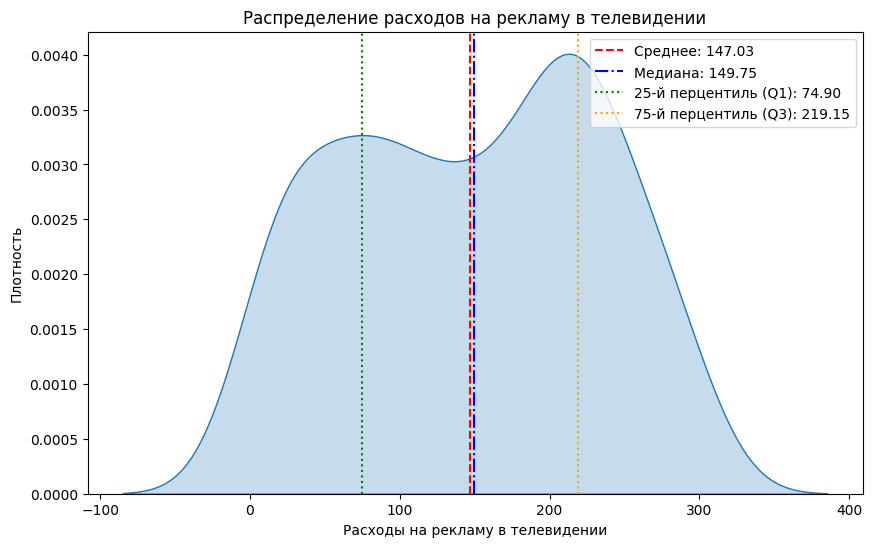

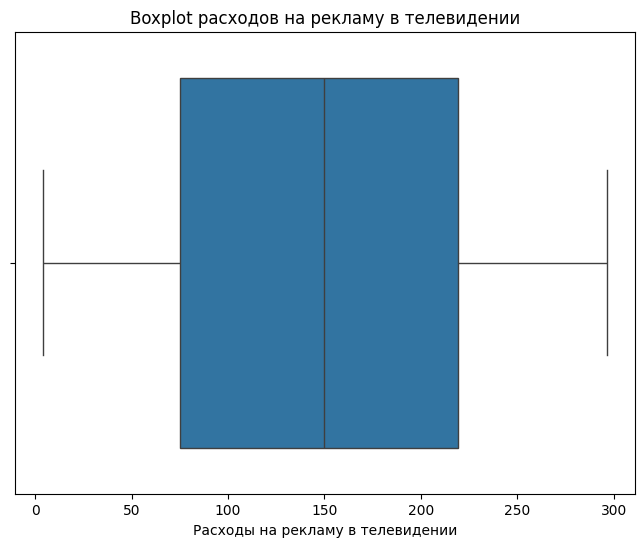

In [ ]:
# Убираем отрицательные значения
df = df[df['TV'] >= 1]

# Вычисляем квартили
q1_tv = df['TV'].quantile(0.25)  # Первый квартиль (25%)
q3_tv = df['TV'].quantile(0.75)  # Третий квартиль (75%)

# Создаем KDE-график
plt.figure(figsize=(10, 6))
sns.kdeplot(df['TV'], fill=True)

# Добавляем вертикальные линии
plt.axvline(mean_value_tv, color='red', linestyle='--', label=f'Среднее: {mean_value_tv:.2f}')
plt.axvline(median_value_tv, color='blue', linestyle='-.', label=f'Медиана: {median_value_tv:.2f}')
plt.axvline(q1_tv, color='green', linestyle=':', label=f'25-й перцентиль (Q1): {q1_tv:.2f}')
plt.axvline(q3_tv, color='orange', linestyle=':', label=f'75-й перцентиль (Q3): {q3_tv:.2f}')

# Настройка графика
plt.title('Распределение расходов на рекламу в телевидении')
plt.xlabel('Расходы на рекламу в телевидении')
plt.ylabel('Плотность')

plt.legend()
plt.show()

# Построение боксплота
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TV'])
plt.title('Boxplot расходов на рекламу в телевидении')
plt.xlabel('Расходы на рекламу в телевидении')

plt.show()

In [ ]:
# Посчитаем межквартильный размах
IQR_TV = q3_tv - q1_tv
q1_tv, q3_tv, IQR_TV

(74.9, 219.15, 144.25)

**Выводы по графику выше:**
- большинство наблюдений сосредоточено в интервале от 75 до 220, с медианой в 144;
- расходы на рекламу в среднем чуть больше средней и медианы;
- вбросов (точек за пределами "усов") не наблюдается, т.е. данные распределены без значительных экстремальных значений.

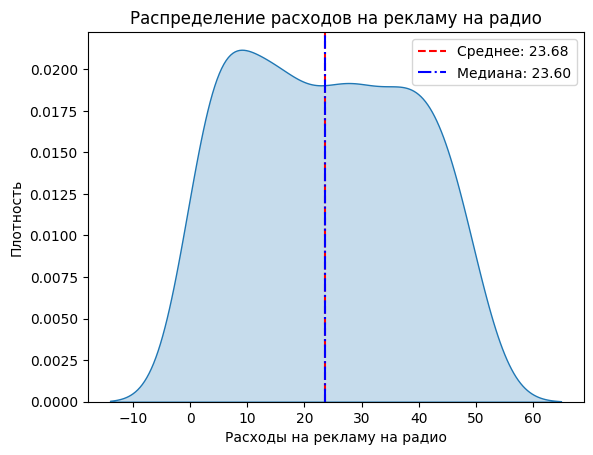

In [ ]:
# Вычисляем среднее и медианное значения
mean_value_radio = df['Radio'].mean()
median_value_radio = df['Radio'].median()

# Строим график KDE
sns.kdeplot(df['Radio'], fill=True)
plt.title('Распределение расходов на рекламу на радио')
plt.xlabel('Расходы на рекламу на радио')
plt.ylabel('Плотность')


plt.axvline(mean_value_radio, color='red', linestyle='--', label=f'Среднее: {mean_value_radio:.2f}')
plt.axvline(median_value_radio, color='blue', linestyle='-.', label=f'Медиана: {median_value_radio:.2f}')

plt.legend()
plt.show()

**Выводы по графику выше:**
- максимальная плотность достигается в диапазоне от 10 до 50, т.е. большинство значений сосредоточено в этом диапазоне;
- среднее и медиана расположены одинаково, что говорит о том, что данные симметричны;
- присутствуют отрицательные значения затрат, что выглядит как аномалия (реальные затраты на рекламу не могут быть отрицательными).

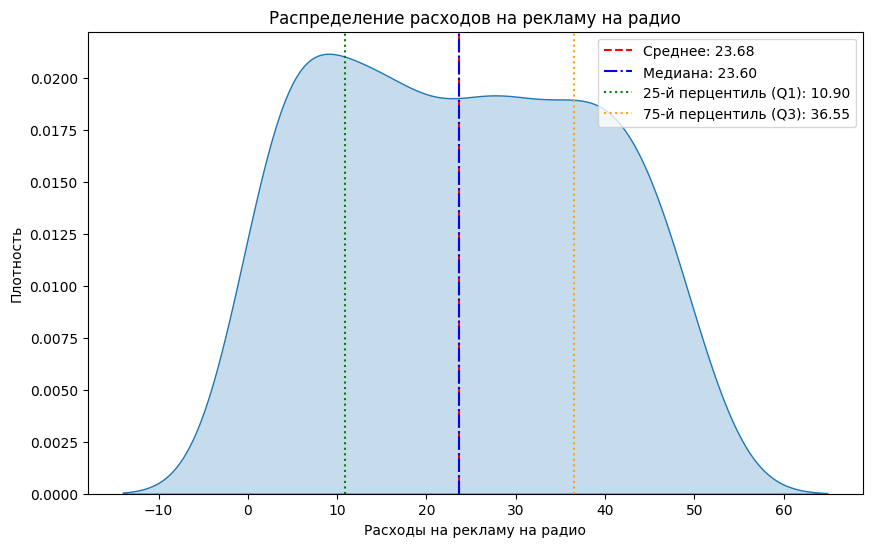

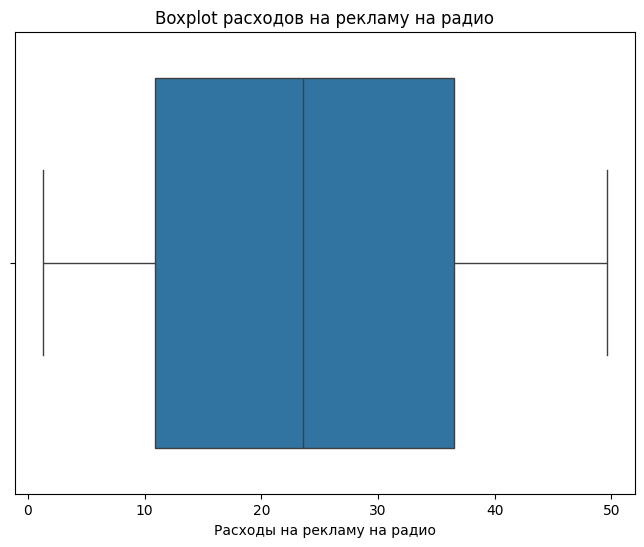

In [ ]:
# Убираем отрицательные значения
df = df[df['Radio'] >= 1]

# Вычисляем квартили
q1_radio = df['Radio'].quantile(0.25)  # Первый квартиль (25%)
q3_radio = df['Radio'].quantile(0.75)  # Третий квартиль (75%)

# Создаем KDE-график
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Radio'], fill=True)


plt.axvline(mean_value_radio, color='red', linestyle='--', label=f'Среднее: {mean_value_radio:.2f}')
plt.axvline(median_value_radio, color='blue', linestyle='-.', label=f'Медиана: {median_value_radio:.2f}')
plt.axvline(q1_radio, color='green', linestyle=':', label=f'25-й перцентиль (Q1): {q1_radio:.2f}')
plt.axvline(q3_radio, color='orange', linestyle=':', label=f'75-й перцентиль (Q3): {q3_radio:.2f}')


plt.title('Распределение расходов на рекламу на радио')
plt.xlabel('Расходы на рекламу на радио')
plt.ylabel('Плотность')

plt.legend()
plt.show()

# Построение боксплота
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Radio'])
plt.title('Boxplot расходов на рекламу на радио')
plt.xlabel('Расходы на рекламу на радио')

plt.show()

**Выводы по обновленному графику с медианой и ящику с усами:**
- большинство наблюдений сосредоточено в интервале от 11 до 35, с медианой в 23.60;
- метрики средней, медианы и перцентилей близки, что говорит о стабильности данных;
- плотность имеет небольшую асимметрию, заметно вытянутую в правую сторону - это говорит о наличии небольшого количества более высоких расходов;
- вбросов не наблюдается, т.е. данные распределены без значительных экстремальных значений.

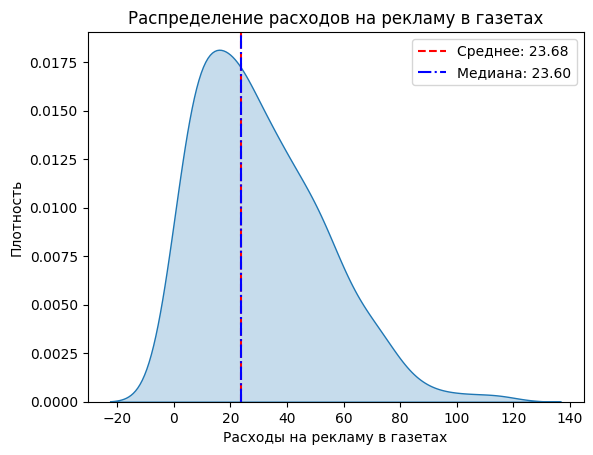

In [ ]:
# Вычисляем среднее и медианное значения
mean_value_news = df['Newspaper'].mean()
median_value_news = df['Newspaper'].median()

# Строим график KDE
sns.kdeplot(df['Newspaper'], fill=True)
plt.title('Распределение расходов на рекламу в газетах')
plt.xlabel('Расходы на рекламу в газетах')
plt.ylabel('Плотность')


plt.axvline(mean_value_radio, color='red', linestyle='--', label=f'Среднее: {mean_value_radio:.2f}')
plt.axvline(median_value_radio, color='blue', linestyle='-.', label=f'Медиана: {median_value_radio:.2f}')

plt.legend()
plt.show()

**Выводы по графику выше:**

- расходы имеют асимметричное распределение с длинным правым "хвостом" - это указывает на то, что у меньшинства кампаний расходы на рекламу сильно выше среднего значения;
- среднее значение составляет 23.68, а медиана — 23.60:  распределение хоть и асимметрично, но не сильно искажено аномально высокими значениями;
- основная концентрация расходов приходится на диапазон около 20-30, что является пиком распределения.

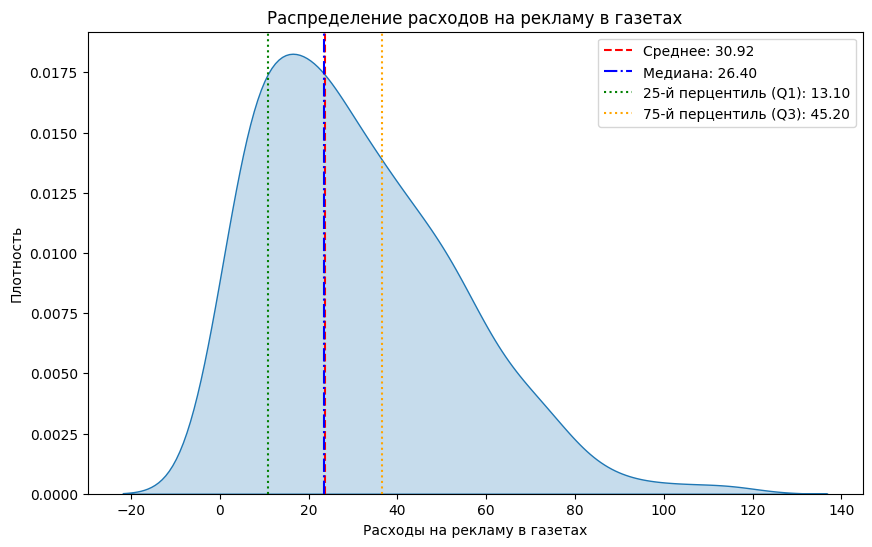

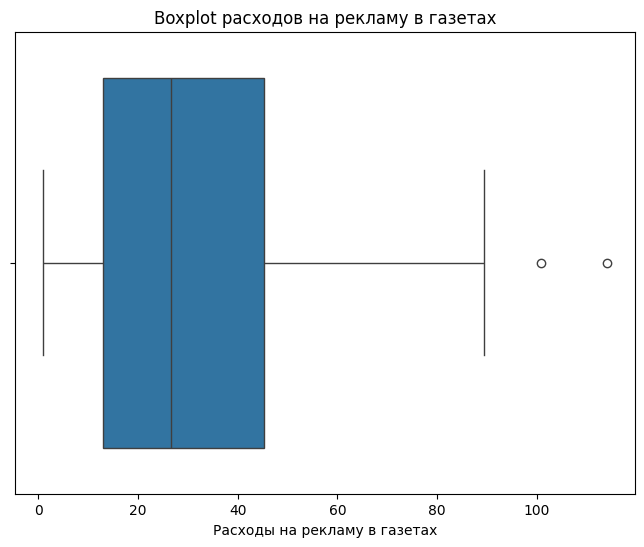

In [ ]:
# Убираем отрицательные значения
df = df[df['Newspaper'] >= 1]

# Вычисляем квартили
q1_news= df['Newspaper'].quantile(0.25)  # Первый квартиль (25%)
q3_news = df['Newspaper'].quantile(0.75)  # Третий квартиль (75%)

# Создаем KDE-график
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Newspaper'], fill=True)


plt.axvline(mean_value_radio, color='red', linestyle='--', label=f'Среднее: {mean_value_news:.2f}')
plt.axvline(median_value_radio, color='blue', linestyle='-.', label=f'Медиана: {median_value_news:.2f}')
plt.axvline(q1_radio, color='green', linestyle=':', label=f'25-й перцентиль (Q1): {q1_news:.2f}')
plt.axvline(q3_radio, color='orange', linestyle=':', label=f'75-й перцентиль (Q3): {q3_news:.2f}')


plt.title('Распределение расходов на рекламу в газетах')
plt.xlabel('Расходы на рекламу в газетах')
plt.ylabel('Плотность')

plt.legend()
plt.show()

# Построение боксплота
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Newspaper'])
plt.title('Boxplot расходов на рекламу в газетах')
plt.xlabel('Расходы на рекламу в газетах')

plt.show()

**Выводы по графику выше:**
- среднее значение (30.92) больше медианы (26.40), что свидетельствует о правосторонней асимметрии в данных;
- 25-й перцентиль (Q1: 13.10) и 75-й перцентиль (Q3: 45.20) показывают, что 50% значений лежат в диапазоне между этими точками - значительная часть данных сосредоточена ближе к началу распределения (меньше 50), что подтверждает небольшой хвост в правой части.
- ящик с усами подтверждает наличие правосторонней асимметрии: делаем вывод, что большинство расходов на рекламу в газетах относительно небольшие;
- видны два явных выброса (точки справа), что говорит о том, что были расходы, значительно больше расходов в среднем.

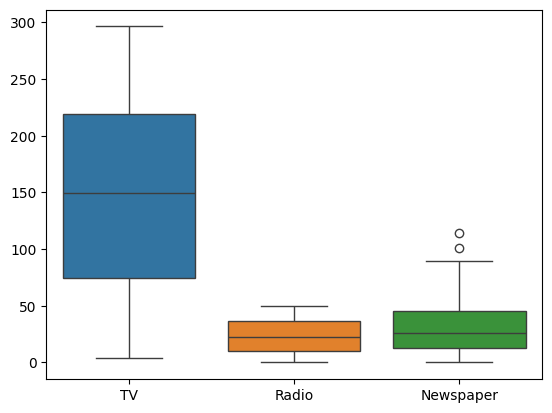

In [ ]:
# Сравниваем boxplot всех каналов рекламы
filtered_df = df.drop(columns=["Product_sales"])
sns.boxplot(filtered_df)
plt.show()

**Вывод:**
- наибольший размах и большие значения расходов приходится на канал TV, в то время как остальные каналы имеют небольшой размах и меньшие значения.

## 4. Сравнение по разным каналам продаж

Построим график рассеяния (scatter plot), чтобы показать связь между затратами на рекламу по разным каналам (TV, Radio, Newspaper) и продажами продуктов (Product_sales).

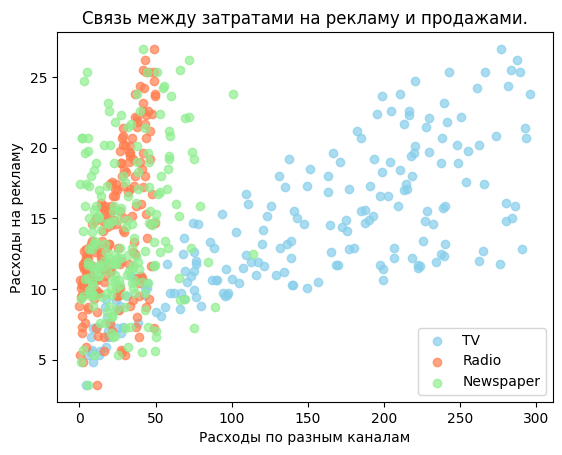

In [ ]:
plt.scatter(df["TV"], df["Product_sales"], color='skyblue', alpha=0.7, label='TV')
plt.scatter(df["Radio"], df["Product_sales"], color='coral', alpha=0.7, label='Radio')
plt.scatter(df["Newspaper"], df["Product_sales"], color='lightgreen', alpha=0.7, label='Newspaper')

plt.xlabel('Расходы по разным каналам')
plt.ylabel('Расходы на рекламу')
plt.title('Cвязь между затратами на рекламу и продажами.')

plt.legend()
plt.show()

**Выводы:**


TV (голубые точки):
- Затраты на рекламу в TV имеют сильную линейную связь с продажами. С увеличением затрат на телевидение продажи растут.


Radio (оранжевые точки):
- Связь скорее нелинейная, с заметным разбросом в средней и высокой области значений.


Newspaper (зеленые точки):
- Наименее выраженная зависимость между затратами на газеты и продажами. Точки расположены более хаотично, что говорит об отсутствии или слабой корреляции.


Сравнение каналов:
- TV показывает наиболее явную положительную корреляцию с продажами, что говорит о высокой эффективности затрат;
- Radio имеет умеренную корреляцию, но результаты менее устойчивы, чем у TV;
- Newspaper практически не оказывают существенного влияния на продажи.

<Axes: >

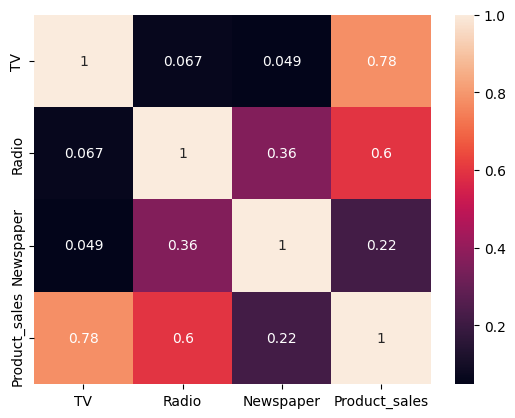

In [ ]:
sns.heatmap(df.corr(),annot=True)

На предоставленной корреляционной тепловой карте можно сделать следующие выводы о взаимосвязи:

- Сильная положительная корреляция между TV и продажами продукта (Product_sales): коэффициент корреляции составляет 0.78, что говорит о сильной зависимости. Это означает, что инвестиции в ТВ-рекламу связаны с увеличением продаж продукта.

- Умеренная положительная корреляция между Radio и продажами продукта: коэффициент корреляции равен 0.6, что указывает на значительную, но менее выраженную зависимость по сравнению с ТВ-рекламой.

- Слабая положительная корреляция между рекламой в Newspaper и продажами продукта: коэффициент корреляции составляет 0.22, что говорит о слабой связи. Реклама в газетах имеет меньшее влияние на продажи продукта.

- Незначительные корреляции между различными каналами рекламы: ТВ и радио имеют крайне слабую положительную корреляцию (0.067), что указывает на то, что эти каналы рекламы используются независимо друг от друга. Радио и газеты имеют умеренную корреляцию (0.36), что может свидетельствовать о некоторой взаимосвязи в использовании этих каналов.

## Основной вывод:
Наиболее эффективным каналом рекламы для увеличения продаж продукта является Телевидение, за ним следует Радио. Реклама в газетах оказывает значительно меньшее влияние на продажи.